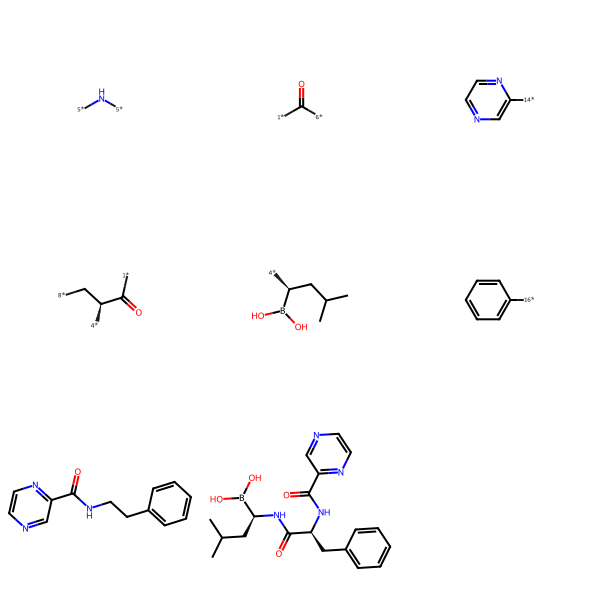

In [1]:
from rdkit import Chem
from rdkit.Chem import Recap
from rdkit.Chem import  Draw  
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import BRICS

smi = "B([C@H](CC(C)C)NC(=O)[C@H](CC1=CC=CC=C1)NC(=O)C2=NC=CN=C2)(O)O"  # 输入分子的 SMILES

m=Chem.MolFromSmiles(smi)
frags =(BRICS.BRICSDecompose(m))
mols=[]
for fsmi in frags:
    mols.append(Chem.MolFromSmiles(fsmi))


core_m1 = MurckoScaffold.GetScaffoldForMol(m)

mols.append(core_m1)
mols.append(m)
Draw.MolsToGridImage(mols,molsPerRow=3,subImgSize=(200,200),legends=['' for x in mols],useSVG=True)

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import BRICS
import matplotlib.pyplot as plt
import math

def extract_core_and_side_chains(smiles):
    mol = Chem.MolFromSmiles(smiles)
    
    # 获取母核
    core = MurckoScaffold.GetScaffoldForMol(mol)
    
    # 获取侧链
    side_chains = Chem.FragmentOnBRICSBonds(mol)
    
    return mol, core, side_chains

def get_fragments(m):
    # 获取 BRICS 片段
    frags = BRICS.BRICSDecompose(m)
    mols = [Chem.MolFromSmiles(fsmi) for fsmi in frags]
    return mols

def visualize_core_and_fragments(smiles, mol, core, frags):
    # 生成2D坐标
    rdDepictor.Compute2DCoords(mol)
    rdDepictor.Compute2DCoords(core)
    
    # 创建绘图对象
    drawer = rdMolDraw2D.MolDraw2DCairo(500, 500)
    drawer.drawOptions().addAtomIndices = True
    
    # 绘制母核
    drawer.DrawMolecule(core)
    drawer.FinishDrawing()
    core_img = drawer.GetDrawingText()  
    
    # 保存母核图像
    with open(f"{smiles}_core.png", "wb") as f:
        f.write(core_img)

    unmatched_fragments = []
    for frag in frags:
        match = mol.HasSubstructMatch(frag)
        if not match:
            unmatched_fragments.append(frag)
    
    return core_img, unmatched_fragments

def visualize_fragments(smiles, mol, unmatched_fragments):
    fig, axs = plt.subplots(1, len(unmatched_fragments) + 1, figsize=(15, 5))
    axs = axs.flatten()

    # 显示母核图像
    axs[0].imshow(plt.imread(f"{smiles}_core.png"))
    axs[0].axis('off')
    axs[0].set_title('Core Structure')
    
    for i, frag in enumerate(unmatched_fragments):
        rdDepictor.Compute2DCoords(frag)
        drawer = rdMolDraw2D.MolDraw2DCairo(500, 500)
        drawer.drawOptions().addAtomIndices = True
        drawer.DrawMolecule(frag)
        drawer.FinishDrawing()
        frag_img = drawer.GetDrawingText()
        
        with open(f"{smiles}_frag_{i}.png", "wb") as f:
            f.write(frag_img)
        
        axs[i + 1].imshow(plt.imread(f"{smiles}_frag_{i}.png"))
        axs[i + 1].axis('off')
        axs[i + 1].set_title(f'Fragment {i + 1}')

    plt.tight_layout()
    plt.show()

def main():
    smiles = "B([C@H](CC(C)C)NC(=O)[C@H](CC1=CC=CC=C1)NC(=O)C2=NC=CN=C2)(O)O"  # 输入分子的 SMILES
    mol, core, _ = extract_core_and_side_chains(smiles)
    frags = get_fragments(mol)
    
    # 可视化母核和片段，并找到不匹配的片段
    core_img, unmatched_fragments = visualize_core_and_fragments(smiles, mol, core, frags)
    
    # 可视化不匹配的片段
    visualize_fragments(smiles, mol, unmatched_fragments)

if __name__ == "__main__":
    main()


In [1]:
from rdkit import Chem

def is_valid_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return False
    try:
        Chem.SanitizeMol(mol)
        return True
    except:
        return False

smiles = 'CC(CO)CC(NC(=O)CCC1=C=C(O)C=C=C1)B(O)O'
if is_valid_smiles(smiles):
    print("The SMILES string is valid.")
else:
    print("The SMILES string is invalid.")


The SMILES string is valid.
